<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa5_uw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




W tej części kodu przetwarzamy zbiór iris tak by pasował do naszej analizy.

In [16]:
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X_train, X_val, y_train, y_val = train_test_split(data.data, data.target, random_state=0)
model = Ridge().fit(X_train, y_train)
perm_test = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)
print(perm_test.importances_mean)
print(type(data.data))
klasa=data.target
zm_x = data.data
data = pd.DataFrame(zm_x, columns=data.feature_names)
data["target"] = klasa
data = pd.DataFrame(data)

# zostawiamy najmniej istotne zmienne, żeby lepiej zobrazować działanie svm z ustawionym jądrem (normalnie byśmy zostawili najistotniejsze zmienne)
iris=pd.DataFrame(data).iloc[:,[0,1,4]]
iris = iris.loc[iris["target"] >0 ]

print(iris.head())
iris


[ 0.05035219 -0.00123606  0.75316559  0.3615811 ]
<class 'numpy.ndarray'>
    sepal length (cm)  sepal width (cm)  target
50                7.0               3.2       1
51                6.4               3.2       1
52                6.9               3.1       1
53                5.5               2.3       1
54                6.5               2.8       1


,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Poniżej tworzymy gęsty zbiór punktów i ewaluujemy wartość funkcji decyzyjnej na każdym z nich.

In [17]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
clf.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
x_min, x_max = iris.iloc[:, 0].min() - 1, iris.iloc[:, 0].max() + 1
y_min, y_max = iris.iloc[:, 1].min() - 1, iris.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision=decision.reshape(xx.shape)
print(decision)



[[-4.31758778 -4.30463207 -4.29164385 ...  0.95996549  0.98258139
   1.00522982]
 [-4.30750914 -4.2944854  -4.28142913 ...  0.99025227  1.01293621
   1.03565268]
 [-4.29750362 -4.28441184 -4.27128753 ...  1.02046593  1.04321792
   1.06600243]
 ...
 [-4.53824398 -4.50508014 -4.47188377 ...  6.74112763  6.78395168
   6.82680825]
 [-4.54988164 -4.51664975 -4.48338534 ...  6.74969812  6.7925902
   6.83551481]
 [-4.56159241 -4.52829249 -4.49496003 ...  6.75819548  6.80115561
   6.84414826]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


W dalszej części kodu generujemy wykresy

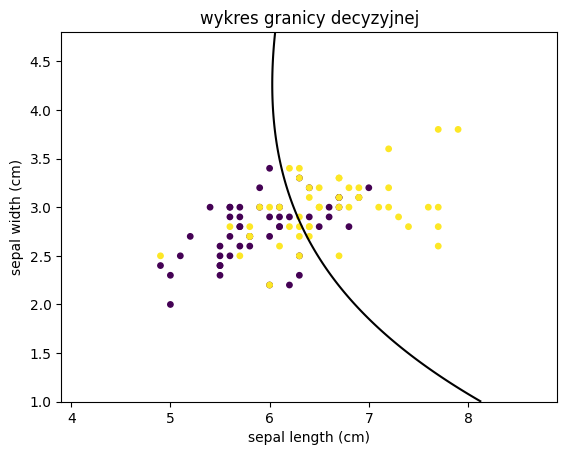

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
xs = iris.iloc[:,0]
ys = iris.iloc[:,1]
m = iris.iloc[:,2]
size = [15 for i in range(len(xs))]

ax.scatter(xs, ys, c=m, s=size)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.contour(xx, yy, decision, levels=[0], colors='black')
plt.title("wykres granicy decyzyjnej")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


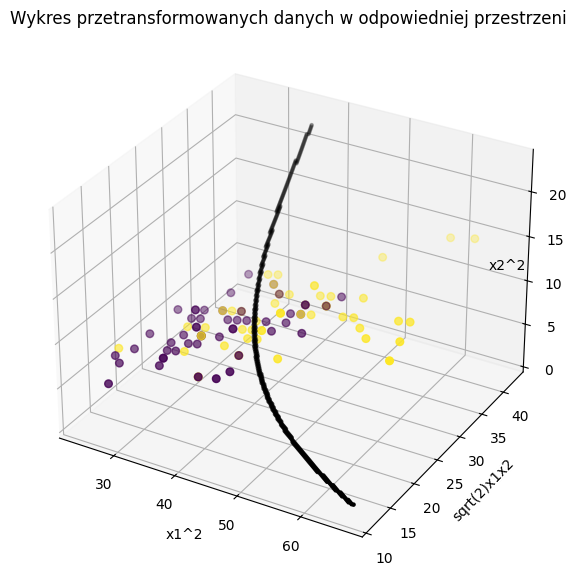

In [19]:
fig = plt.figure(figsize=(10, 7))

ax2 = fig.add_subplot(projection='3d')

phi_x_iris = pd.DataFrame({"x1_squared" : iris["sepal length (cm)"]**2, "sqrt(2)x1x2":np.sqrt(2)*iris['sepal length (cm)']*iris['sepal width (cm)'], "x2_squared":iris['sepal width (cm)']**2})
new_iris = pd.concat([phi_x_iris, iris.iloc[:,-1]], axis=1)

sizer = [30 for i in range(len(new_iris.iloc[:,0]))]
ax2.scatter(new_iris.iloc[:,0], new_iris.iloc[:,1], new_iris.iloc[:,2], c=iris.iloc[:,-1], s=sizer)

phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.02)
ax2.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')
ax2.set_xlabel("x1^2")
ax2.set_ylabel('sqrt(2)x1x2')
ax2.set_zlabel('x2^2', labelpad=-30)
plt.title("Wykres przetransformowanych danych w odpowiedniej przestrzeni")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'x2^2')

<Figure size 640x480 with 0 Axes>

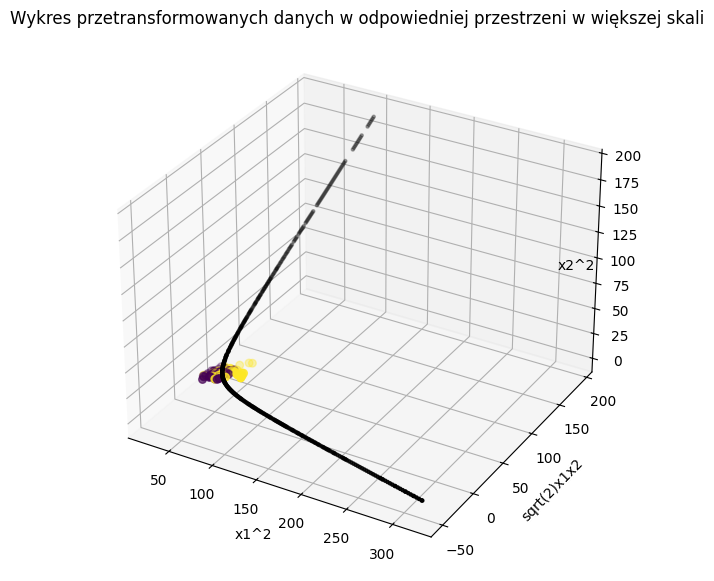

In [20]:
from mpl_toolkits.mplot3d import Axes3D
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

x_min, x_max = iris.iloc[:, 0].min() - 10, iris.iloc[:, 0].max() + 10
y_min, y_max = iris.iloc[:, 1].min() - 10, iris.iloc[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

grid = np.c_[xx.ravel(), yy.ravel()]

fig = plt.figure(figsize=(10, 7))

ax3 = fig.add_subplot(projection='3d')
ax3.scatter(new_iris.iloc[:,0], new_iris.iloc[:,1], new_iris.iloc[:,2], c=iris.iloc[:,-1], s=sizer)

phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.02)
ax3.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')
ax3.set_title('Wykres przetransformowanych danych w odpowiedniej przestrzeni w większej skali')

ax3.set_xlabel("x1^2")
ax3.set_ylabel('sqrt(2)x1x2')
ax3.set_zlabel('x2^2', labelpad=-30)


Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane, even though we know the classifier’s separating surface is mathematically linear in that space?

Żeby odpowiedzieć na to i następne pytanie zastanówmy się czym jest granica decyzyjna zarówno w przypadku oryginalnej przestrzeni 2-wymiarowej jak i w przypadku przestrzeni 3-wymiarowej, w której leżą punkty z obrazu w transformacji $\phi$. W przypadku tej pierwszej możemy uznać że ta granica to pewien podzbiór punktów, który oddziela obszary, których punkty są klasyfikowane do różnych klas. Dokładniej omówimy jak ten zbiór wygląda w drugim pytaniu. Jeśli chodzi o granicę decyzyjną w przypadku przestrzeni po transformacji to wiemy, że jej punkty spełniają równanie $w^{T}\phi(x)+b=0$. Gdzie $w$ to wektor wag, a $phi(x)$ to wektor współrzędnych obrazu x, zaś b to stała. Widzimy, że opisuje ono przestrzeń afiniczniczną, w naszym przypadku płaszczyznę w przestrzeni o bazie ${x^2, \sqrt{2}xy, y^2}$. Jednak naszym celem było separowanie punktów w wyjściowej przestrzeni, a druga przestrzeń była potrzebna do uzyskania liniowości ale na innym układzie współrzędnych. W związku z tym granica decyzyjna składa się jedynie z obrazów punktów z oryginalnej przestrzeni. Rysując ją korzystaliśmy z obrazów punktów $\phi(x)$, gdzie $x\in\mathbb{R}^2$, a następnie wybieraliśmy te które spełniają (oczywiście w przybliżeniu wspomniane równanie). W związku z tym jest ona przecięciem wspomnianej płaszczyzny z obrazem $\mathbb{R}^2$ przy odwzorowaniu $\phi$. Ten drugi zbiór oczywiście nie jest całą przestrzenią np. $(-1,0,0)$ nie należy do niego. Jest to pewna rozmaitość leżąca w tej przestrzeni. Zatem wspomniane przecięcie płaszczyzny afinicznej z jak już wiemy rozmaitością nie tworzy płaszczyzny ani prostej, a zazwyczaj pewną krzywą, stąd ta hiperpowierzchnia nie wygląda płasko co widać na obu wykresach 3D.


Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.

Wróćmy do granicy decyzyjnej z oryginalnej przestrzeni. Podobnie jak ta w innej przestrzeni, jest ona wyznaczona przez równanie: $w^{T}\phi(x)+b=0$. Jednak teraz osiami współrzędnych są x i y oraz rozpatrujemy wszystkie pary $(x,y)$ je spełniające (wcześniej rozpatrywaliśmy tylko niektóre trójki ${x^2, \sqrt{2}xy, y^2}$). Stąd równanie to ma postać $w_1x^2+w_2\sqrt{2}xy+w_3y^2+b=0$  w tych zmiennych równanie nie jest liniowe i w zależności od wag i b wyznacza różne krzywe stożkowe np. okrąg czy elipsę. Fragment łuku stanowiący przykład widzimy na wykresie pt. "wykres granicy decyzyjnej".